## Fase 2

In [20]:
import pandas as pd

In [60]:
# Cargamos el dataset desde un archivo CSV local
df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")

C:\Users\salom\AppData\Local\Temp\ipykernel_9208\3356739288.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")


In [61]:
df

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387140,2021-10-24 00:00:00,4990088,2021-10-19 00:00:00,76,VALLE,76520,PALMIRA,37,1,M,...,NaN,NaN,Recuperado,2021-10-13 00:00:00,NaN,2021-10-23 00:00:00,2021-10-27 00:00:00,Tiempo,6.0,NaN
6387141,2021-10-24 00:00:00,4990091,2021-10-23 00:00:00,76,VALLE,76520,PALMIRA,36,1,M,...,NaN,NaN,Recuperado,2021-10-16 00:00:00,NaN,2021-10-23 00:00:00,2021-10-30 00:00:00,Tiempo,6.0,NaN
6387142,2021-10-24 00:00:00,4990092,2021-10-19 00:00:00,76,VALLE,76364,JAMUNDI,39,1,F,...,NaN,NaN,Recuperado,2021-10-18 00:00:00,NaN,2021-10-23 00:00:00,2021-11-01 00:00:00,Tiempo,6.0,NaN
6387143,2021-10-24 00:00:00,4990095,2021-11-05 00:00:00,76,VALLE,76364,JAMUNDI,43,1,F,...,NaN,NaN,Recuperado,2021-10-21 00:00:00,NaN,2021-10-23 00:00:00,2021-11-04 00:00:00,PCR,6.0,NaN


In [62]:
# Analizamos los datos faltantes de cada una de las columnas del dataframe
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Código ISO del país,6383439,99.941977
Nombre del país,6383431,99.941852
Nombre del grupo étnico,6303291,98.687144
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Estado,41200,0.645046
Ubicación del caso,41200,0.645046
Recuperado,36260,0.567703


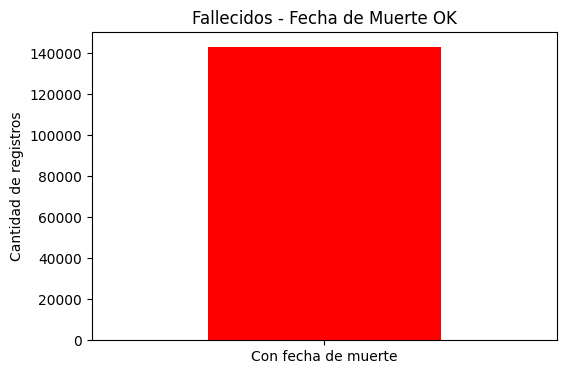

(143110, 23)

In [63]:
# Revisar graficamente la cantidad de campos faltantes (NaN) en la columna "Fecha de muerte" para el Estado "Fallecido", con esto, podemos concluir
# si es necesario eliminar la columna o no es necesario para próximos análisis

import matplotlib.pyplot as plt

# Filtrar solo los fallecidos
df_fallecidos = df[df["Estado"] == "Fallecido"]

# Contar nulos y no nulos en la columna fecha de muerte
conteo = df_fallecidos["Fecha de muerte"].isnull().value_counts()

# Renombrar los índices: True = Sin fecha, False = Con fecha
labels_map = {True: "Sin fecha de muerte", False: "Con fecha de muerte"}
conteo.index = [labels_map[i] for i in conteo.index]

# Gráfico
conteo.plot(kind="bar", color=["red", "green"], figsize=(6,4))
plt.title("Fallecidos - Fecha de Muerte OK")
plt.ylabel("Cantidad de registros")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

df_fallecidos.shape

In [64]:
# Resumen global vs. fallecidos: Comparamos nulos en "Fecha de muerte" a nivel general y solo en Estado "Fallecido",para verificar si la 
# columna es consistente y decidir si mantenerla o no

pd.DataFrame({
    "Total registros": [df.shape[0], total_fallecidos],
    "Nulos Fecha de muerte": [nulos_global, nulos_fallecidos],
    "% Nulos": [porc_nulos_global, porc_nulos_fallecidos]
}, index=["Global", "Solo fallecidos"])

,Total registros,Nulos Fecha de muerte,% Nulos
Global,6387145,6202835,97.11436
Solo fallecidos,143110,0,0.00000


In [65]:
# Se identificaron varias columnas con datos faltantes. Eliminamos aquellas con más del 95% de valores nulos,
# excepto "Fecha de muerte". Aunque presenta muchos nulos a nivel global (debido a estados distintos a "Fallecido"),
# en los registros de fallecidos está completa al 100%, por lo que se conserva para futuros análisis

# Eliminar las columnas no deseadas según el análisis previo
columnas_a_eliminar = [
    "Código ISO del país",
    "Nombre del país",
    "Nombre del grupo étnico"
]
df = df.drop(columns=columnas_a_eliminar)

# Guardar un nuevo CSV sin esas columnas
df.to_csv("dataset_limpio.csv", index=False, encoding="utf-8-sig")


In [69]:
# Cargamos el dataset limpio desde un archivo CSV local
df = pd.read_csv("dataset_limpio.csv")

# Analizamos nuevamente los datos faltantes de cada una de las columnas del dataframe para confirmar que se eliminaron 
# las columnas con más del 95% de datos faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Ubicación del caso,41200,0.645046
Estado,41200,0.645046
Recuperado,36260,0.567703
Fecha de diagnóstico,2755,0.043134
Pertenencia étnica,560,0.008768
Fecha de notificación,0,0.000000
